In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import networkx as nx
import numpy as np
from random import randint
import io

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("steam.csv")

In [4]:
df.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [5]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [6]:
df.shape

(27075, 18)

In [7]:
df.nunique(axis=0)

appid               27075
name                27033
release_date         2619
english                 2
developer           17113
publisher           14354
platforms               7
required_age            6
categories           3333
genres               1552
steamspy_tags        6423
achievements          410
positive_ratings     2800
negative_ratings     1492
average_playtime     1345
median_playtime      1312
owners                 13
price                 282
dtype: int64

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,596203.508661,0.981127,0.354903,45.248864,1000.558523,211.027147,149.804949,146.056030,6.078193
std,250894.167246,0.136081,2.406044,352.670281,18988.724439,4284.938531,1827.038141,2353.880080,7.874922
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,401230.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.690000
50%,599070.000000,1.000000,0.000000,7.000000,24.000000,9.000000,0.000000,0.000000,3.990000
75%,798760.000000,1.000000,0.000000,23.000000,126.000000,42.000000,0.000000,0.000000,7.190000
max,1069460.000000,1.000000,18.000000,9821.000000,2644404.000000,487076.000000,190625.000000,190625.000000,421.990000


In [9]:
df.describe(include='O')

,name,release_date,developer,publisher,platforms,categories,genres,steamspy_tags,owners
count,27075,27075,27075,27075,27075,27075,27075,27075,27075
unique,27033,2619,17113,14354,7,3333,1552,6423,13
top,Dark Matter,2018-07-13,Choice of Games,Big Fish Games,windows,Single-player,Action;Indie,Action;Indie;Casual,0-20000
freq,3,64,94,212,18398,6110,1852,845,18596


In [10]:
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [11]:
df[df.duplicated(keep='first')]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price


In [12]:
df['genres']=df['genres'].str.split(';').fillna(df['genres'])

In [13]:
df = df.explode('genres', ignore_index=True)

In [14]:
df.to_csv("genres.csv")

In [15]:
df.head(50)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


<AxesSubplot:>

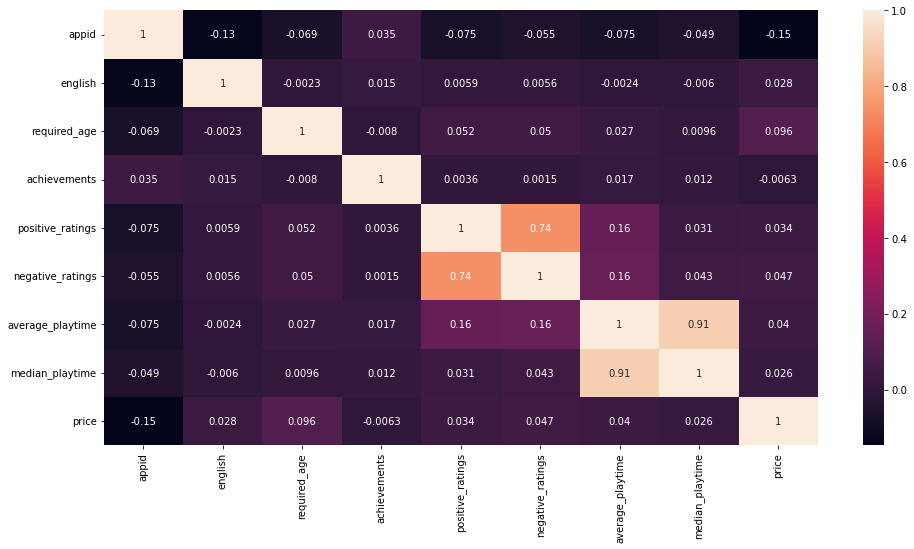

In [16]:
plt.figure(figsize=(16,8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

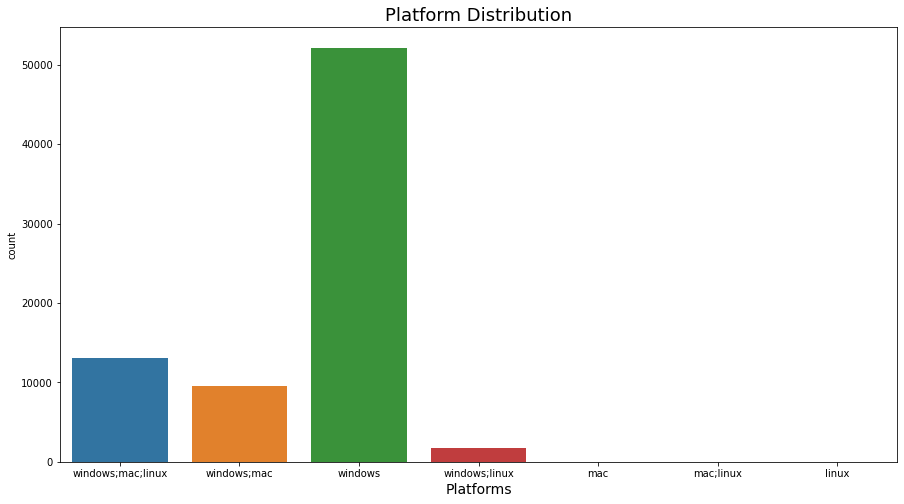

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'platforms', data = df)
plt.title('Platform Distribution',size=18)
plt.xlabel('Platforms',size=14)
plt.show()

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].dt.year.value_counts()

2018    24532
2017    18882
2016    12168
2015     7067
2019     6646
2014     3694
2013     1005
2012      708
2011      472
2009      461
2010      395
2008      216
2007      113
2006       63
2005        9
2001        7
2003        7
2004        6
2002        3
1997        3
1999        2
2000        2
1998        1
Name: release_date, dtype: int64

In [104]:
S = nx.Graph()
S.add_nodes_from(df['name'], bipartite='Games')
S.add_nodes_from(df['genres'], bipartite='Genres')
S.add_edges_from(
    [(row['genres'], row['name']) for idx, row in df.iterrows()])

In [105]:
nx.write_gexf(S, "steam_bipartite.gexf")

In [144]:
df_genres = pd.read_csv('genres-fixed.csv')
G = nx.from_pandas_edgelist(df_genres,source='Source',target='Target', edge_attr='Weight')

In [24]:
G.number_of_nodes()

29

In [25]:
G.number_of_edges()

277

In [26]:
np.mean([d for _, d in G.degree()])

19.103448275862068

In [27]:
nx.density(G)

0.6822660098522167

In [28]:
nx.number_connected_components(G)

1

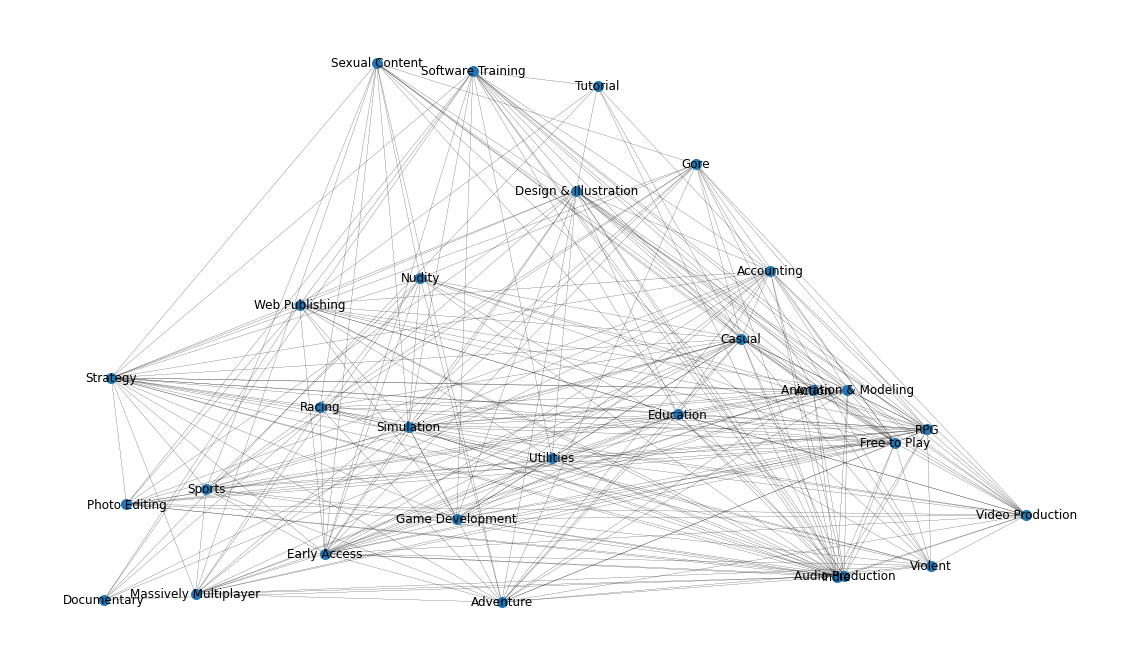

In [62]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.axis("off")
plot_options = {"node_size": 100, "with_labels": True, "width": 0.2}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

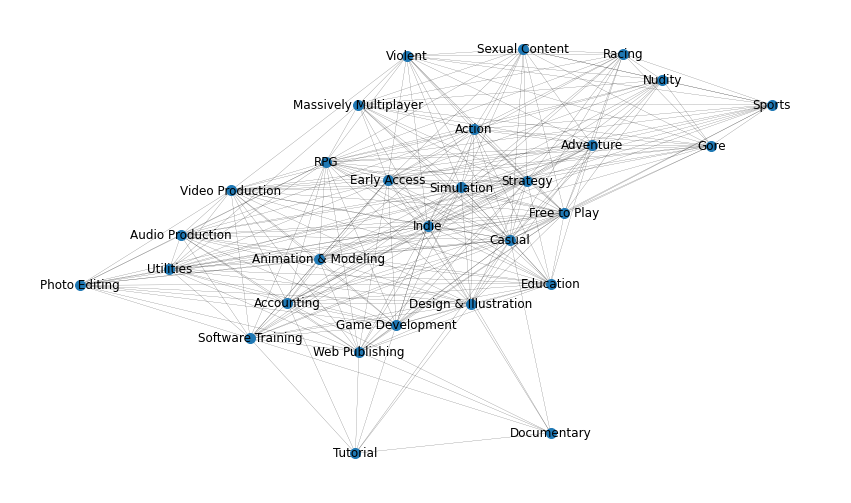

In [64]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 100, "with_labels": True, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

### Degree Centralities

In [65]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

[('Indie', 1.0),
 ('Casual', 1.0),
 ('Free to Play', 0.9285714285714285),
 ('Strategy', 0.9285714285714285),
 ('RPG', 0.9285714285714285),
 ('Simulation', 0.8928571428571428),
 ('Early Access', 0.8928571428571428),
 ('Video Production', 0.75),
 ('Design & Illustration', 0.75),
 ('Action', 0.7142857142857142),
 ('Adventure', 0.7142857142857142),
 ('Education', 0.7142857142857142),
 ('Accounting', 0.7142857142857142),
 ('Animation & Modeling', 0.6785714285714285),
 ('Web Publishing', 0.6785714285714285),
 ('Software Training', 0.6785714285714285),
 ('Audio Production', 0.6428571428571428),
 ('Utilities', 0.6428571428571428),
 ('Massively Multiplayer', 0.6071428571428571),
 ('Game Development', 0.6071428571428571),
 ('Violent', 0.5714285714285714),
 ('Gore', 0.5714285714285714),
 ('Racing', 0.5357142857142857),
 ('Nudity', 0.5357142857142857),
 ('Sports', 0.5357142857142857),
 ('Sexual Content', 0.5357142857142857),
 ('Photo Editing', 0.5357142857142857),
 ('Documentary', 0.25),
 ('Tutori

In [66]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))

[('Indie', 28),
 ('Casual', 28),
 ('Free to Play', 26),
 ('Strategy', 26),
 ('RPG', 26),
 ('Simulation', 25),
 ('Early Access', 25),
 ('Video Production', 21),
 ('Design & Illustration', 21),
 ('Action', 20),
 ('Adventure', 20),
 ('Education', 20),
 ('Accounting', 20),
 ('Animation & Modeling', 19),
 ('Web Publishing', 19),
 ('Software Training', 19),
 ('Audio Production', 18),
 ('Utilities', 18),
 ('Massively Multiplayer', 17),
 ('Game Development', 17),
 ('Violent', 16),
 ('Gore', 16),
 ('Racing', 15),
 ('Nudity', 15),
 ('Sports', 15),
 ('Sexual Content', 15),
 ('Photo Editing', 15),
 ('Documentary', 7),
 ('Tutorial', 7)]

Text(0, 0.5, 'Counts')

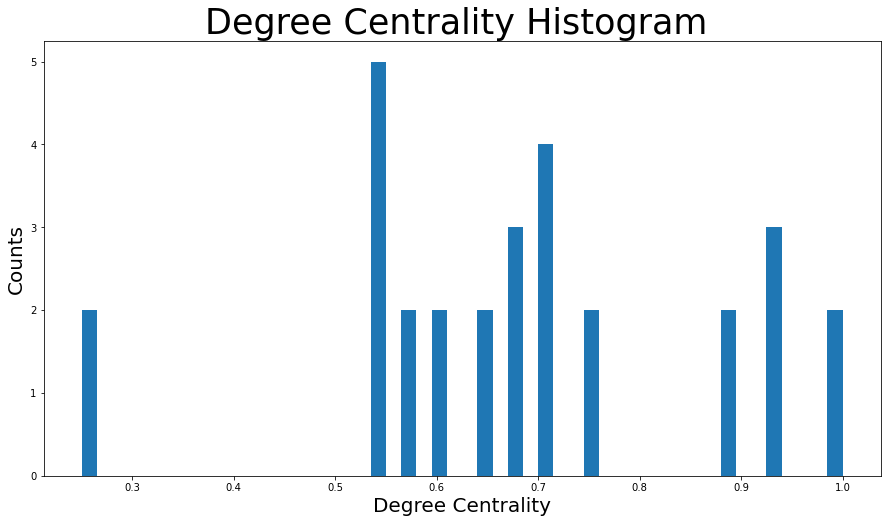

In [33]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=50) # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.7021799430283056,
 0.6815284386384335,
 -1.1794586987829287,
 0.8885891633822502)

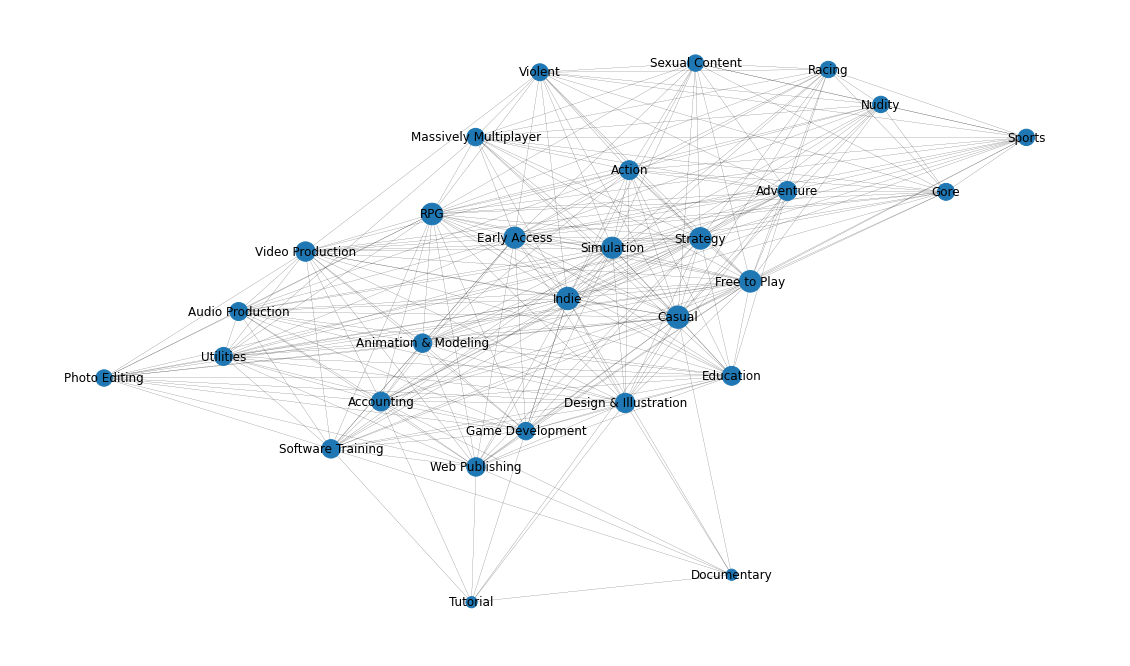

In [74]:
node_size = [
    v * 500 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=True, width=0.15)
plt.axis("off")

### Betweenness centralities

In [51]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))


[('Indie', 0.05883929415675448),
 ('Casual', 0.05883929415675448),
 ('Free to Play', 0.026652345303138956),
 ('Strategy', 0.026652345303138956),
 ('RPG', 0.026652345303138956),
 ('Simulation', 0.022394345807044223),
 ('Early Access', 0.022394345807044223),
 ('Design & Illustration', 0.01668701668701669),
 ('Accounting', 0.013590421923755258),
 ('Web Publishing', 0.0109347442680776),
 ('Software Training', 0.0109347442680776),
 ('Video Production', 0.009187417520750855),
 ('Action', 0.008974153418597863),
 ('Adventure', 0.008974153418597863),
 ('Education', 0.005491950730045967),
 ('Massively Multiplayer', 0.0038568427457316345),
 ('Animation & Modeling', 0.0030185863519196854),
 ('Utilities', 0.002826098064193302),
 ('Audio Production', 0.001685660018993352),
 ('Violent', 0.0011655011655011655),
 ('Gore', 0.0011655011655011655),
 ('Game Development', 0.00035273368606701937),
 ('Racing', 0.0),
 ('Nudity', 0.0),
 ('Sports', 0.0),
 ('Sexual Content', 0.0),
 ('Photo Editing', 0.0),
 ('Docu

Text(0, 0.5, 'Counts')

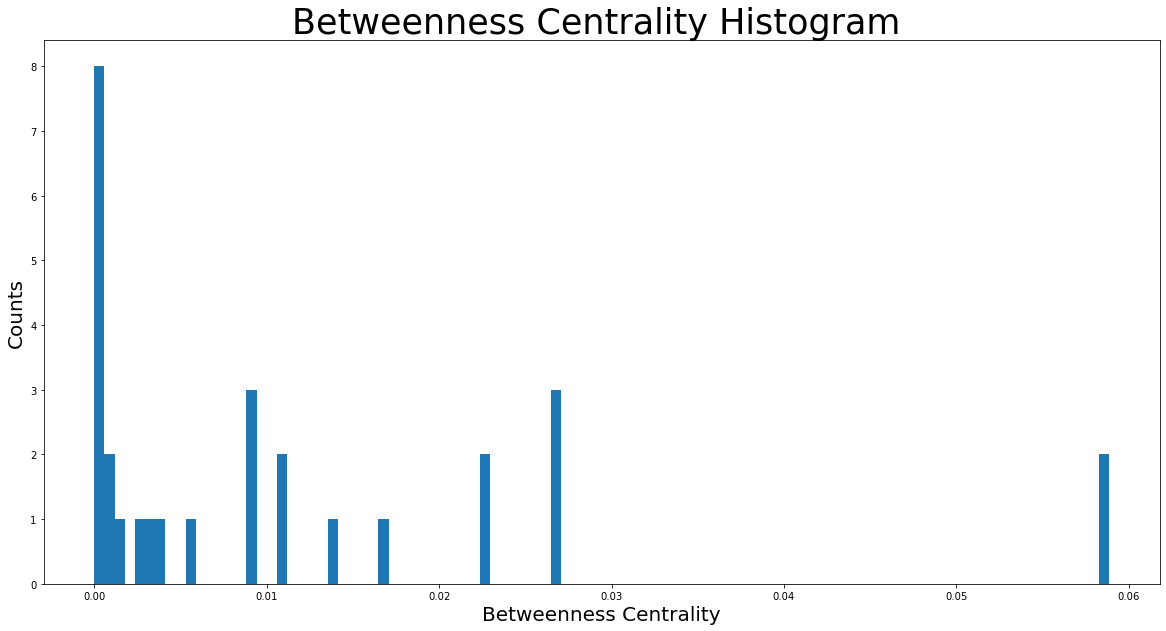

In [52]:
plt.figure(figsize=(20, 10))
plt.hist(betweenness_centrality.values(), bins=100)
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.7021799430283056,
 0.6815284386384335,
 -1.1794586987829287,
 0.8885891633822502)

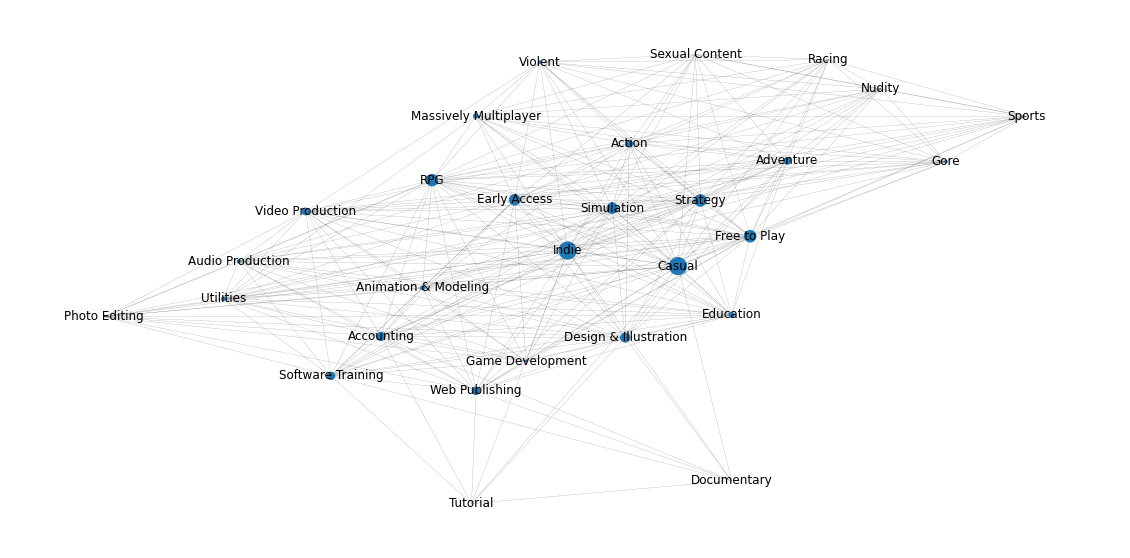

In [73]:
node_size = [
    v * 5000 for v in betweenness_centrality.values()
] 
plt.figure(figsize=(20, 10))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=True, width=0.1)
plt.axis("off")

### Closeness Centralities

In [54]:
closeness_centrality = nx.centrality.closeness_centrality(G)
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))

[('Indie', 1.0),
 ('Casual', 1.0),
 ('Free to Play', 0.9333333333333333),
 ('Strategy', 0.9333333333333333),
 ('RPG', 0.9333333333333333),
 ('Simulation', 0.9032258064516129),
 ('Early Access', 0.9032258064516129),
 ('Video Production', 0.8),
 ('Design & Illustration', 0.8),
 ('Action', 0.7777777777777778),
 ('Adventure', 0.7777777777777778),
 ('Education', 0.7777777777777778),
 ('Accounting', 0.7777777777777778),
 ('Animation & Modeling', 0.7567567567567568),
 ('Web Publishing', 0.7567567567567568),
 ('Software Training', 0.7567567567567568),
 ('Audio Production', 0.7368421052631579),
 ('Utilities', 0.7368421052631579),
 ('Massively Multiplayer', 0.717948717948718),
 ('Game Development', 0.717948717948718),
 ('Violent', 0.7),
 ('Gore', 0.7),
 ('Racing', 0.6829268292682927),
 ('Nudity', 0.6829268292682927),
 ('Sports', 0.6829268292682927),
 ('Sexual Content', 0.6829268292682927),
 ('Photo Editing', 0.6829268292682927),
 ('Documentary', 0.5714285714285714),
 ('Tutorial', 0.5714285714285

Text(0, 0.5, 'Counts')

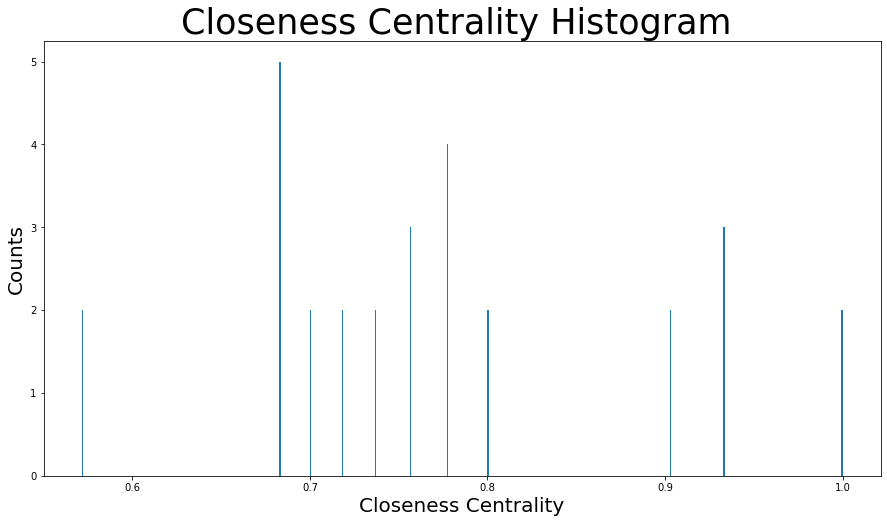

In [55]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=600)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.7021799430283056,
 0.6815284386384335,
 -1.1794586987829287,
 0.8885891633822502)

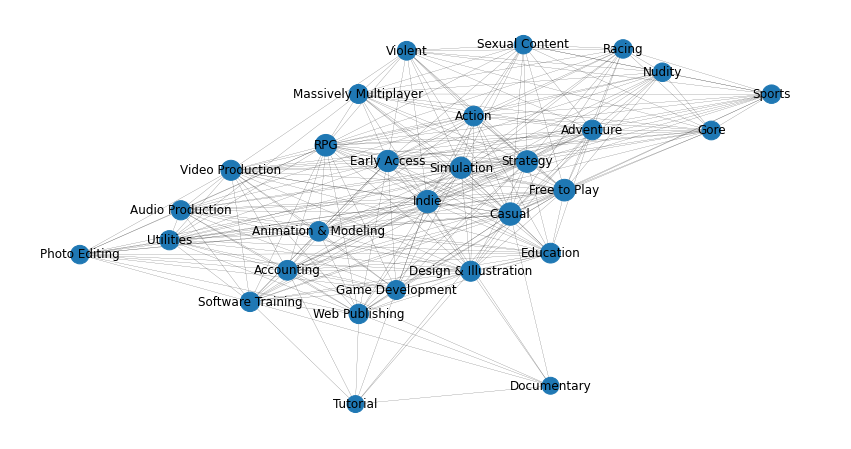

In [76]:
node_size = [
    v * 500 for v in closeness_centrality.values()
] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=True, width=0.15)
plt.axis("off")

### Eigenvector Centrality

In [57]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(G, max_iter=1000)  
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

[('Indie', 0.24389628288626683),
 ('Casual', 0.24389628288626683),
 ('Free to Play', 0.23800650626164152),
 ('Strategy', 0.23800650626164152),
 ('RPG', 0.23800650626164152),
 ('Simulation', 0.23100822748566452),
 ('Early Access', 0.23100822748566452),
 ('Video Production', 0.20347652445663028),
 ('Education', 0.1966660952876991),
 ('Design & Illustration', 0.19499416774340805),
 ('Adventure', 0.18965933585206055),
 ('Action', 0.1893836108325958),
 ('Animation & Modeling', 0.18910439111878274),
 ('Accounting', 0.1861475410802953),
 ('Audio Production', 0.180244884964247),
 ('Utilities', 0.17895996247005055),
 ('Web Publishing', 0.17728803492575956),
 ('Software Training', 0.17728803492575956),
 ('Game Development', 0.17139825830113423),
 ('Massively Multiplayer', 0.16187648624554044),
 ('Violent', 0.15383496040319758),
 ('Gore', 0.15383496040319758),
 ('Photo Editing', 0.1498162475230024),
 ('Racing', 0.1443300554504541),
 ('Nudity', 0.14433005545045408),
 ('Sports', 0.14433005545045408

Text(0, 0.5, 'Counts')

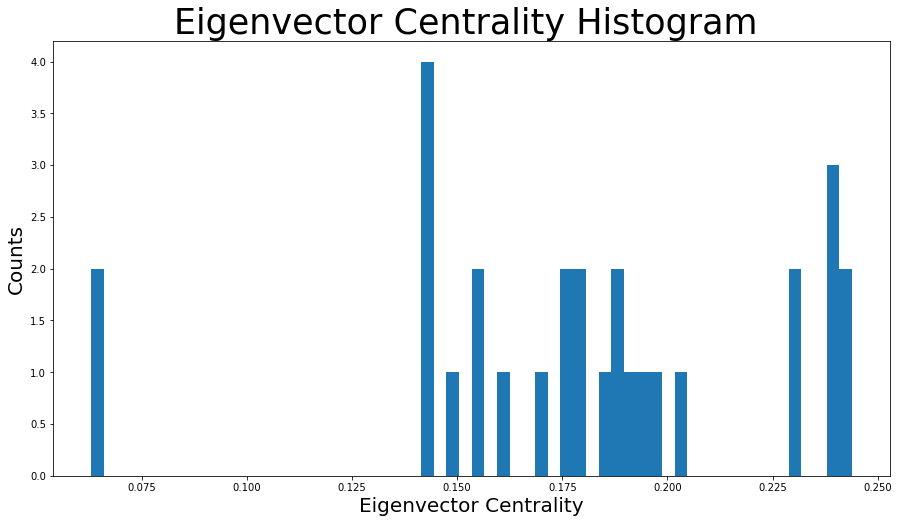

In [58]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.7021799430283056,
 0.6815284386384335,
 -1.1794586987829287,
 0.8885891633822502)

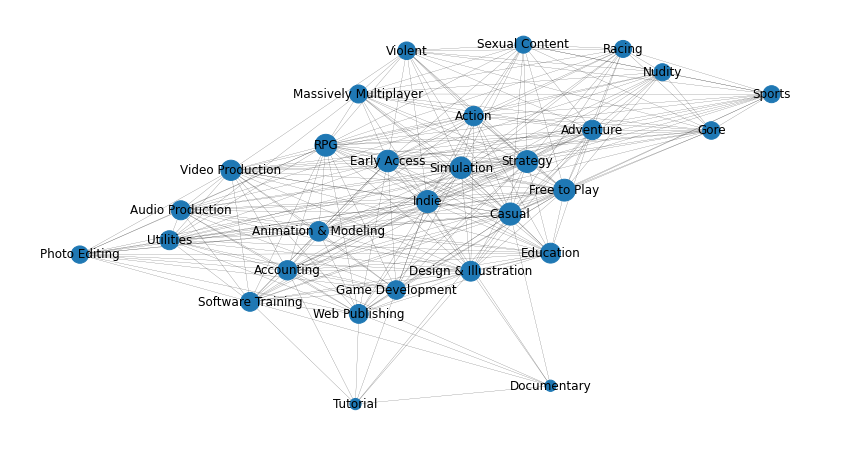

In [78]:
node_size = [
    v * 2000 for v in eigenvector_centrality.values()
] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=True, width=0.15)
plt.axis("off")

### Assortavity

In [48]:
nx.degree_assortativity_coefficient(G)

-0.1391628674718925

In [49]:
nx.degree_pearson_correlation_coefficient(G) 

-0.13916286747189274

### Clustering Coefficient

In [50]:
nx.average_clustering(G)

0.8719763873719247

## Genre Evolution

In [81]:
date_range = str(df['release_date'].dt.date.min()) + ' to ' +str(df['release_date'].dt.date.max())
print(date_range)

1997-06-30 to 2019-05-01


In [82]:
### Segregating data into various date ranges
df_95 = df[(df['release_date'] >= '1995-1-1') & (df['release_date'] < '2000-1-1')]
df_00 = df[(df['release_date'] >= '2000-1-1') & (df['release_date'] < '2005-1-1')]
df_05 = df[(df['release_date'] >= '2005-1-1') & (df['release_date'] < '2010-1-1')]
df_10 = df[(df['release_date'] >= '2010-1-1') & (df['release_date'] < '2015-1-1')]
df_15 = df[(df['release_date'] >= '2015-1-1') & (df['release_date'] < '2020-1-1')]

#### Converting the dataframes of different times to gexf file for visualization in Gephi

In [89]:
#95'
A = nx.Graph()
A.add_nodes_from(df_95['name'], bipartite='Games')
A.add_nodes_from(df_95['genres'], bipartite='Genres')
A.add_edges_from(
    [(row['genres'], row['name']) for idx, row in df_95.iterrows()])
nx.write_gexf(A, "95_steam.gexf")

In [90]:
#00'
B = nx.Graph()
B.add_nodes_from(df_00['name'], bipartite='Games')
B.add_nodes_from(df_00['genres'], bipartite='Genres')
B.add_edges_from(
    [(row['genres'], row['name']) for idx, row in df_00.iterrows()])
nx.write_gexf(B, "00_steam.gexf")

In [91]:
#05'
C = nx.Graph()
C.add_nodes_from(df_05['name'], bipartite='Games')
C.add_nodes_from(df_05['genres'], bipartite='Genres')
C.add_edges_from(
    [(row['genres'], row['name']) for idx, row in df_05.iterrows()])
nx.write_gexf(C, "05_steam.gexf")

In [92]:
#10'
D = nx.Graph()
D.add_nodes_from(df_10['name'], bipartite='Games')
D.add_nodes_from(df_10['genres'], bipartite='Genres')
D.add_edges_from(
    [(row['genres'], row['name']) for idx, row in df_10.iterrows()])
nx.write_gexf(D, "10_steam.gexf")

In [93]:
#15'
E = nx.Graph()
E.add_nodes_from(df_15['name'], bipartite='Games')
E.add_nodes_from(df_15['genres'], bipartite='Genres')
E.add_edges_from(
    [(row['genres'], row['name']) for idx, row in df_15.iterrows()])
nx.write_gexf(E, "15_steam.gexf")

### Analysing network with additional node attributes such as Rating and Median Play time

#### Setting Net Ratings and Median Play Time as node attributes

In [128]:
df['net_ratings'] = df['positive_ratings'] - df['negative_ratings']

In [133]:
df_grouped_ratings = df.groupby(['genres'])['net_ratings'].sum()
df_grouped_MPT = df.groupby(['genres'])['median_playtime'].sum()

In [138]:
ratings_dict = df_grouped_ratings.to_dict()

In [139]:
MPT_dict = df_grouped_MPT.to_dict()

In [141]:
nx.set_node_attributes(G, ratings_dict, 'Net Ratings')
nx.set_node_attributes(G, MPT_dict, 'Median Play Time')

In [142]:
nx.write_gexf(G, "genre_attributes.gexf")